## Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

In [1]:
import pydataset
from env import get_db_url

import pandas as pd
import numpy as np

from prepare import prep_titanic
from prepare import titanic_split

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

#import graphviz
#from graphviz import Graph

In [2]:
df = prep_titanic()
df['baseline_prediction'] = 0
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline_prediction
0,0,0,3,male,1,0,7.2500,S,0,1,0,1,0
1,1,1,1,female,1,0,71.2833,C,0,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1,0
3,3,1,1,female,1,0,53.1000,S,0,0,0,1,0
4,4,0,3,male,0,0,8.0500,S,1,1,0,1,0


In [3]:
df, train, validate, test = titanic_split(df)

<hr style="border: 2px solid #000000;">

In [4]:
# inspect size
train.shape, validate.shape, test.shape

((534, 13), (178, 13), (179, 13))

In [5]:
# inspect
train.info(), validate.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   passenger_id         534 non-null    int64  
 1   survived             534 non-null    int64  
 2   pclass               534 non-null    int64  
 3   sex                  534 non-null    object 
 4   sibsp                534 non-null    int64  
 5   parch                534 non-null    int64  
 6   fare                 534 non-null    float64
 7   embarked             534 non-null    object 
 8   alone                534 non-null    int64  
 9   sex_male             534 non-null    uint8  
 10  embarked_Q           534 non-null    uint8  
 11  embarked_S           534 non-null    uint8  
 12  baseline_prediction  534 non-null    int64  
dtypes: float64(1), int64(7), object(2), uint8(3)
memory usage: 47.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 176 to 

(None, None, None)

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [6]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline_prediction
0,0,0,3,male,1,0,7.2500,S,0,1,0,1,0
1,1,1,1,female,1,0,71.2833,C,0,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1,0
3,3,1,1,female,1,0,53.1000,S,0,0,0,1,0
4,4,0,3,male,0,0,8.0500,S,1,1,0,1,0


### Chekcing to the count for survived passengers. 
* The value 0 means False and 1 means True.

In [7]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [8]:
df.head(1)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline_prediction
0,0,0,3,male,1,0,7.25,S,0,1,0,1,0


## The baseline accuracy:

In [9]:
# checking the baseline accuracy
baseline_accuracy = (df.survived == df.baseline_prediction).mean()
baseline_accuracy

0.6161616161616161

<hr style="border: 2px solid #000000;">

In [10]:
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare',
       'embarked', 'alone', 'sex_male', 'embarked_Q', 'embarked_S',
       'baseline_prediction'],
      dtype='object')

In [11]:
'pclass', 'sex', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 

('pclass', 'sex', 'sibsp', 'parch', 'fare', 'alone', 'sex_male')

In [12]:
df.dtypes

passenger_id             int64
survived                 int64
pclass                   int64
sex                     object
sibsp                    int64
parch                    int64
fare                   float64
embarked                object
alone                    int64
sex_male                 uint8
embarked_Q               uint8
embarked_S               uint8
baseline_prediction      int64
dtype: object

In [13]:
df['fare'] = df['fare'].astype('float64')

<hr style="border: 2px solid #000000;">

In [14]:
# create X & y version of train/validate/test
# where X contains the features we want to use and y is a series with just the target variable

X_train = train.drop(columns=['passenger_id', 'survived', 'sex', 'embarked', 'embarked_Q', 
        'embarked_S', 'baseline_prediction'])
y_train = train.survived

In [15]:
X_validate = validate.drop(columns=['passenger_id', 'survived', 'sex', 'embarked', 'embarked_Q', 
        'embarked_S', 'baseline_prediction'])
y_validate = validate.survived

In [16]:
X_test = test.drop(columns=['passenger_id', 'survived', 'sex', 'embarked', 'embarked_Q', 
        'embarked_S', 'baseline_prediction'])
y_test = test.survived

<hr style="border: 2px solid #000000;">

In [17]:
#Compare df columns

print(f"""train:
{train.columns.to_list()} 
_____________________________________________
X_train:
{X_train.columns.to_list()}
_____________________________________________
X_validate:
{X_validate.columns.to_list()}
""")

train:
['passenger_id', 'survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked', 'alone', 'sex_male', 'embarked_Q', 'embarked_S', 'baseline_prediction'] 
_____________________________________________
X_train:
['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male']
_____________________________________________
X_validate:
['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male']



### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [19]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [20]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)

In [21]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 1, 0, 0, 0])

In [22]:
#estimates probabilty

y_proba = clf.predict_proba(X_train)
y_proba[0:5]

array([[0.905     , 0.095     ],
       [0.01785714, 0.98214286],
       [0.69105691, 0.30894309],
       [0.69105691, 0.30894309],
       [0.905     , 0.095     ]])

In [23]:
#compute the accuracy

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.82


### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
#get the accuracy score of train set
train_score = clf.score(X_train, y_train)
train_score


0.8183520599250936

In [26]:
# confusion matrix


cm = confusion_matrix(y_train, y_pred)
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
             columns=['Pred 0', 'Pred 1'])


,Pred 0,Pred 1
Actual 0,295,34
Actual 1,63,142


In [27]:
#target value count

y_train.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [28]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80       534
weighted avg       0.82      0.82      0.82       534



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [29]:
 def print_cm_metrics(cm):    
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn)/(tn + fp + fn + tp)

    true_positive_rate = tp/(tp + fn)
    false_positive_rate = fp/(fp + tn)
    true_negative_rate = tn/(tn + fp)
    false_negative_rate = fn/(fn + tp)

    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1_score = 2*(precision*recall)/(precision+recall)

    support_pos = tp + fn
    support_neg = fp + tn

    dict = {
        'metric' : ['accuracy'
                    ,'true_positive_rate'
                    ,'false_positive_rate'
                    ,'true_negative_rate'
                    ,'false_negative_rate'
                    ,'precision'
                    ,'recall'
                    ,'f1_score'
                    ,'support_pos'
                    ,'support_neg']
        ,'score' : [accuracy
                    ,true_positive_rate
                    ,false_positive_rate
                    ,true_negative_rate
                    ,false_negative_rate
                    ,precision
                    ,recall
                    ,f1_score
                    ,support_pos
                    ,support_neg]
    }

    return pd.DataFrame(dict)

In [30]:
print_cm_metrics(cm)

,metric,score
0,accuracy,0.818352
1,true_positive_rate,0.692683
2,false_positive_rate,0.103343
3,true_negative_rate,0.896657
4,false_negative_rate,0.307317
5,precision,0.806818
6,recall,0.692683
7,f1_score,0.745407
8,support_pos,205.000000
9,support_neg,329.000000


### 5. Run through steps 2-4 using a different max_depth value.

In [31]:
def decision_tree(k, X, y):
    
    clf = DecisionTreeClassifier(max_depth=k, random_state=123)
    clf = clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    
    y_proba = clf.predict_proba(X)
    
    
    return y_pred, y_proba, k, clf


In [32]:
def decision_metrics(X, y, y_pred):
    score = clf.score(X, y)
    cm = confusion_matrix(y, y_pred)
    
    
    report = classification_report(y, y_pred)
    
    return score, cm, report

In [33]:
print_cm_metrics(cm)

,metric,score
0,accuracy,0.818352
1,true_positive_rate,0.692683
2,false_positive_rate,0.103343
3,true_negative_rate,0.896657
4,false_negative_rate,0.307317
5,precision,0.806818
6,recall,0.692683
7,f1_score,0.745407
8,support_pos,205.000000
9,support_neg,329.000000


In [34]:
metric_list1 = decision_metrics(X_train, y_train, y_pred)

In [35]:
list = ['The train score for the model is:', 'Confusion Matrix:', 'Confusion Matrix DataFrame:', 'Classification Report:']

for i, metric in enumerate(metric_list1): # to add number to a tuple ex.: (o, seq[0]), (1, seq[1])
    if i == 2:
        print(list[2])
        print(metric)
        print('--------')
    else:
        print(list[i])
        print(metric)
        print('--------')


The train score for the model is:
0.8183520599250936
--------
Confusion Matrix:
[[295  34]
 [ 63 142]]
--------
Confusion Matrix DataFrame:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80       534
weighted avg       0.82      0.82      0.82       534

--------


### 6. Which model performs better on your in-sample data?

# Max Depth 3

In [36]:
clf3 = decision_tree(3, X_train, y_train)
y_pred, y_proba, k, clf = clf3

In [37]:


metric_list = decision_metrics(X_train, y_train, y_pred)

score, cm, report = metric_list

In [38]:
print_cm_metrics(cm)

,metric,score
0,accuracy,0.818352
1,true_positive_rate,0.692683
2,false_positive_rate,0.103343
3,true_negative_rate,0.896657
4,false_negative_rate,0.307317
5,precision,0.806818
6,recall,0.692683
7,f1_score,0.745407
8,support_pos,205.000000
9,support_neg,329.000000


In [39]:
list = ['The train score for the model is:', 'Confusion Matrix:', 'Confusion Matrix DataFrame:', 'Classification Report:']
print(f'Model with Max Depth {k}:')
print()
for i, metric in enumerate(metric_list): # to add number to a tuple ex.: (o, seq[0]), (1, seq[1])
    if i == 2:
        print(list[2])
        print(metric)
        print('--------')
    else:
        print(list[i])
        print(metric)
        print('--------')

Model with Max Depth 3:

The train score for the model is:
0.8183520599250936
--------
Confusion Matrix:
[[295  34]
 [ 63 142]]
--------
Confusion Matrix DataFrame:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80       534
weighted avg       0.82      0.82      0.82       534

--------


# Max Depth 5


In [40]:
clf5 = decision_tree(5, X_train, y_train)
y_pred, y_proba, k, clf = clf5

In [41]:
metric_list = decision_metrics(X_train, y_train, y_pred)

In [42]:
print_cm_metrics(metric_list[1])

,metric,score
0,accuracy,0.818352
1,true_positive_rate,0.692683
2,false_positive_rate,0.103343
3,true_negative_rate,0.896657
4,false_negative_rate,0.307317
5,precision,0.806818
6,recall,0.692683
7,f1_score,0.745407
8,support_pos,205.000000
9,support_neg,329.000000


In [43]:
metric_list[0]

0.8408239700374532

In [44]:
max_list = []
list1 = ['The train score for the model is:', 'Confusion Matrix:', 'Confusion Matrix DataFrame:', 'Classification Report:']
print(f'Model with Max Depth {k}:')
print()
for i, metric in enumerate(metric_list): # to add number to a tuple ex.: (o, seq[0]), (1, seq[1])
    max_list.append(metric)
    if i == 2:
        print(list1[i])
        print(metric)
        print()
        print('---------------------------------------')

    else:
        print(list[i])
        print(metric)
        print('---------------------------------------')
        
        

Model with Max Depth 5:

The train score for the model is:
0.8408239700374532
---------------------------------------
Confusion Matrix:
[[295  34]
 [ 63 142]]
---------------------------------------
Confusion Matrix DataFrame:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80       534
weighted avg       0.82      0.82      0.82       534


---------------------------------------


In [45]:
max5_list = max_list

# Max Depth 3

In [46]:
clf3 = decision_tree(3, X_train, y_train)
y_pred, y_proba, k, clf = clf3

In [47]:
metric_list = decision_metrics(X_train, y_train, y_pred)

In [48]:
print_cm_metrics(cm)

,metric,score
0,accuracy,0.818352
1,true_positive_rate,0.692683
2,false_positive_rate,0.103343
3,true_negative_rate,0.896657
4,false_negative_rate,0.307317
5,precision,0.806818
6,recall,0.692683
7,f1_score,0.745407
8,support_pos,205.000000
9,support_neg,329.000000


In [49]:
max_list = []
list1 = ['The train score for the model is:', 'Confusion Matrix:', 'Confusion Matrix DataFrame:', 'Classification Report:']
print(f'Model with Max Depth {k}:')
print()
for i, metric in enumerate(metric_list): # to add number to a tuple ex.: (o, seq[0]), (1, seq[1])
    max_list.append(metric)
    if i == 2:
        print(list1[i])
        print(metric)
        print()
        print('---------------------------------------')

     
    else:
        print(list1[i])
        print(metric)
        print('---------------------------------------')
    

Model with Max Depth 3:

The train score for the model is:
0.8183520599250936
---------------------------------------
Confusion Matrix:
[[295  34]
 [ 63 142]]
---------------------------------------
Confusion Matrix DataFrame:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80       534
weighted avg       0.82      0.82      0.82       534


---------------------------------------


In [50]:
max3_list = max_list


# Comaprison

In [51]:
print(max3_list[2])

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80       534
weighted avg       0.82      0.82      0.82       534



In [52]:
print(max5_list[2])

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80       534
weighted avg       0.82      0.82      0.82       534



In [53]:
# accuracy for max depth 3
max3_list[0]

0.8183520599250936

In [54]:
# baseline
baseline_accuracy

0.6161616161616161

In [55]:
print(f'''***********Comparison***********

Model with Max Depth 3:

Accuracy: {max3_list[0]}

Baseline Comparison: {round(max3_list[0] - baseline_accuracy,4)}


            VS


Model with Max Depth 5:

Accuracy: {max5_list[0]}

Baseline Comparison: {round(max5_list[0] - baseline_accuracy,4)}
     ''')

***********Comparison***********

Model with Max Depth 3:

Accuracy: 0.8183520599250936

Baseline Comparison: 0.2022


            VS


Model with Max Depth 5:

Accuracy: 0.8408239700374532

Baseline Comparison: 0.2247
     


# 7. Which model performs best on your out-of-sample data, the validate set?

# Validation Comparison

In [69]:
i = [3, 5]


# storing my values to use them to create dictiojnaries containg 
# all the collected data for head to head comaprison
train_depth = []
train_score_list = [] 
val_score_list = []
trn_report_list = []
val_report_list = []
diff_list = []


for i in i:
    y_pred, y_proba, k, clf = decision_tree(i, X_train, y_train)

    # Compute score
    trn_score = clf.score(X_train, y_train)
    val_score = clf.score(X_validate, y_validate)
    trn_report = classification_report(y_train, y_pred)
    y_val_pred = clf.predict(X_validate)
    val_report = classification_report(y_validate, y_val_pred)
    val_report_list.append(val_report)
    train_score_list.append(trn_score)
    val_score_list.append(val_score)
    train_depth.append(i)


    print(f'Training Dataset Model with Max Depth of {i},')

    # Print the model's accuracy and other information
    print(f"Model's Accuracy: {trn_score}")
    print(f"Difference between Model and Basleine Accuracy: {trn_score - baseline_accuracy}")
    print('Train Classification Report')
    print(trn_report)
    print()
    print('           VS             ')
    print()
    print(f'Validation Dataset Model with Max Depth of {i},')

    print(f"Model's Accuracy: {val_score}")
    print(f"Difference between Model and Basleine Accuracy: {val_score - baseline_accuracy}")
    print('Validate Classification Report')
    print(val_report)
    print()
    print(f'Difference bewtween Training and Validate:{trn_score-val_score}')
    #print(val_report)
    print()
    print('----------------------------------------------------')
    print()

    # Increment 'i' and 'j' for the next iteration
    i += 1

    diff = trn_score-val_score
    diff_list.append(diff)

# create dictionaries for my data collection
train_dict = {x: y for x, y in zip(train_depth, train_score_list)}
val_dict = {x: y for x, y in zip(train_depth, val_score_list)}
diff_dict = {x: y for x, y in zip(train_depth, diff_list)}


model_number = 1
for key, value in diff_dict.items():
    if value == min(diff_dict.values()):
        print()
        print(f'Top Model #{model_number}')
        print('*************FINAL ANALYSIS*************')
        print()
        print(f'''Top performing Training Model:
        Max Depth:{key}
        Accuracy:{max(train_dict.values())}
        
Top performing Validation Model:

        Max Depth:{key}
        Accuracy:{max(val_dict.values())}
        Difference:{min(diff_dict.values())}''')
        model_number+=1

Training Dataset Model with Max Depth of 3,
Model's Accuracy: 0.8183520599250936
Difference between Model and Basleine Accuracy: 0.2021904437634775
Train Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80       534
weighted avg       0.82      0.82      0.82       534


           VS             

Validation Dataset Model with Max Depth of 3,
Model's Accuracy: 0.7921348314606742
Difference between Model and Basleine Accuracy: 0.17597321529905807
Validate Classification Report
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.75      0.68      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg  

In [70]:
diff_dict

{3: 0.02621722846441943, 5: 0.08239700374531844}

In [71]:
val_dict

{3: 0.7921348314606742, 5: 0.7584269662921348}

In [72]:
train_dict

{3: 0.8183520599250936, 5: 0.8408239700374532}

# Comparison

# Running a range of 1-10 and Comapring the results

In [88]:
i = 1


# storing my values to use them to create dictiojnaries containg 
# all the collected data for head to head comaprison
train_depth = []
train_score_list = [] 
val_score_list = []
trn_report_list = []
val_report_list = []
diff_list = []


while i < 11:
    y_pred, y_proba, k, clf = decision_tree(i, X_train, y_train)

    # Compute score
    trn_score = clf.score(X_train, y_train)
    val_score = clf.score(X_validate, y_validate)
    trn_report = classification_report(y_train, y_pred)
    y_val_pred = clf.predict(X_validate)
    val_report = classification_report(y_validate, y_val_pred)
    val_report_list.append(val_report)
    train_score_list.append(trn_score)
    val_score_list.append(val_score)
    train_depth.append(i)


    print(f'Training Dataset Model with Max Depth of {i},')

    # Print the model's accuracy and other information
    print(f"Model's Accuracy: {trn_score}")
    print(f"Difference between Model and Basleine Accuracy: {trn_score - baseline_accuracy}")
    print('Train Classification Report')
    print(trn_report)
    print()
    print('           VS             ')
    print()
    print(f'Validation Dataset Model with Max Depth of {i},')

    print(f"Model's Accuracy: {val_score}")
    print(f"Difference between Model and Basleine Accuracy: {val_score - baseline_accuracy}")
    print('Validate Classification Report')
    print(val_report)
    print()
    print(f'Difference bewtween Training and Validate:{trn_score-val_score}')
    #print(val_report)
    print()
    print('----------------------------------------------------')
    print()

    # Increment 'i' and 'j' for the next iteration
    i += 1

    diff = trn_score-val_score
    diff_list.append(diff)

# create dictionaries for my data collection
train_dict = {x: y for x, y in zip(train_depth, train_score_list)}
val_dict = {x: y for x, y in zip(train_depth, val_score_list)}
diff_dict = {x: y for x, y in zip(train_depth, diff_list)}

print('*************FINAL ANALYSIS*************')
model_number = 1
for key, value in diff_dict.items():
    if value == min(diff_dict.values()):
        print()
        print(f'Top Model #{model_number}')
        
        print()
        print(f'''Top performing Training Model:
        
Max Depth:{key}
Accuracy:{max(train_dict.values())}
        
Top performing Validation Model:

Max Depth:{key}
Accuracy:{max(val_dict.values())}
Difference:{min(diff_dict.values())}''')
        model_number+=1
        print('---------------------------------')

Training Dataset Model with Max Depth of 1,
Model's Accuracy: 0.7921348314606742
Difference between Model and Basleine Accuracy: 0.17597321529905807
Train Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80       534
weighted avg       0.82      0.82      0.82       534


           VS             

Validation Dataset Model with Max Depth of 1,
Model's Accuracy: 0.7752808988764045
Difference between Model and Basleine Accuracy: 0.15911928271478837
Validate Classification Report
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.71      0.69      0.70        68

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg 

In [76]:
key_values = []
for key, value in diff_dict.items():
    key_values.append(key)

In [77]:
train_values = train_dict.values()

In [78]:
validate_values = val_dict.values()

In [79]:
diff_values = diff_dict.values()

In [80]:
df = pd.DataFrame({'depth':key_values, 'train_acc':train_values, 'validate_acc':validate_values, 'difference':diff_values})


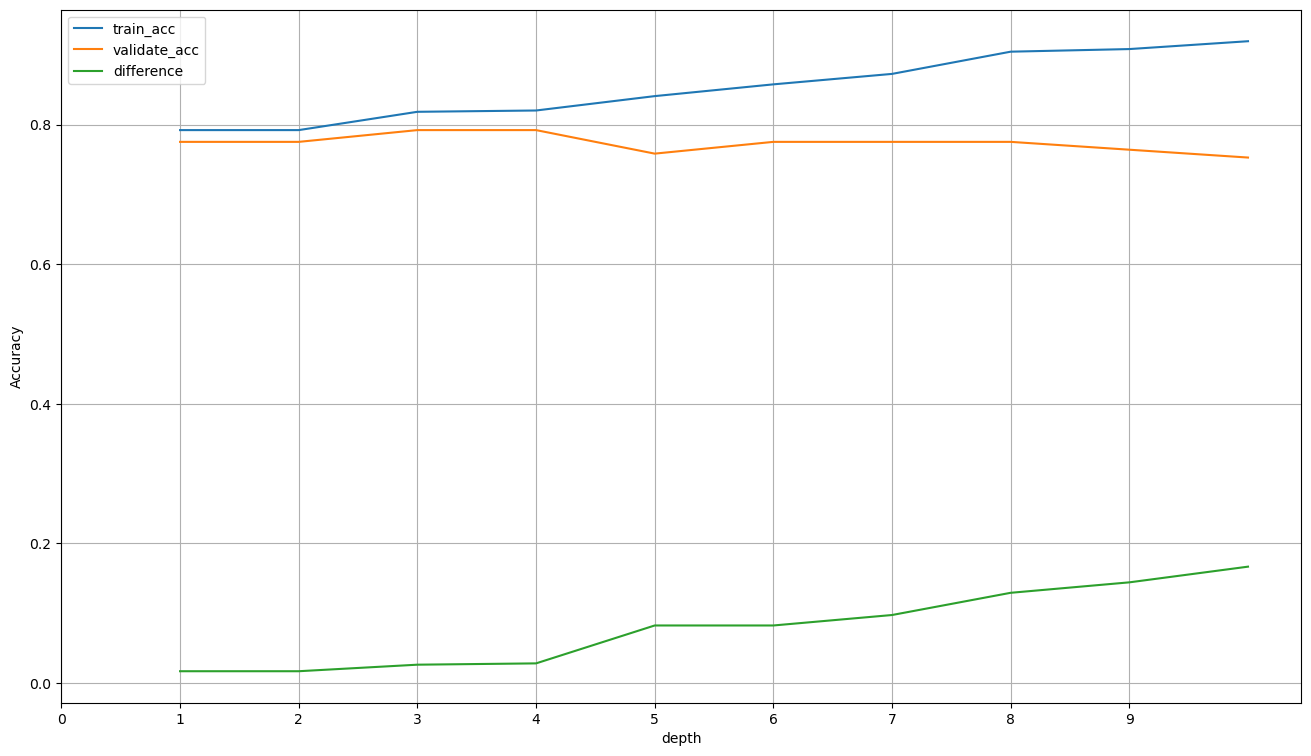

In [81]:
df.set_index('depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,10,1))
plt.grid()